# 3. Feature Selection

<div class="alert alert-block alert-info">

[1. The needed steps](#1st-bullet)<br>
- [1.1 Import the needed libraries](#2nd-bullet)<br>
- [1.2 Import the dataset](#3rd-bullet)<br>
- [1.3. Data pre-processing, data partition and scaling](#4th-bullet)<br>
    
[2. Feature Selection](#5th-bullet)<br>
- [2.1 Filter methods](#6th-bullet)<br>
    - [2.1.1 Univariate variables](#7th-bullet)<br>
    - [2.1.2 Spearman Correlation](#8th-bullet)<br>
    - [2.1.3 Chi-Square](#9th-bullet)<br>
- [2.2 Wrapper Methods](#10th-bullet)<br>
    - [2.2.1 RFE](#11th-bullet)<br>
- [2.3 Embedded Methods](#12th-bullet)<br>
    - [2.3.1 Lasso](#13th-bullet)<br>
- [2.4 Final Insights](#14th-bullet)<br>
    
</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. The needed steps
    

    
</div>

<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="3rd-bullet">

### 1.2. Import the dataset
    
</a>

__`Step 1`__ Import the dataset __titanic.csv__ using the method `read_csv()` from pandas. Using the method `head()`, check the first 3 rows of the dataset.<br>
- _Documentation pandas.read_csv():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html <br>
- _Documentation pandas.DataFrame.head():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

`INPUT VARIABLES`: numerical and categorical <br>
`OUPUT VARIABLE`: numeric (binary classification) <br>

__GOAL__: Predict survival on the Titanic

`Age` : passenger age in years <br>
`Cabin` : cabin number <br>
`Embarked` : Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton <br>
`Fare`: Passenger fare <br>
`Name` : Passenger name <br>
`Parch`: # of parents / children aboard the Titanic <br>
`PassengerId`: Passenger unique identification <br>
`Pclass`: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd <br>
`Sex`: passenger gender <br>
`SibSp`: # of siblings / spouses aboard the Titanic <br>
`Survived`: Survival (Dependent variable): 0 = No, 1 = Yes <br>
`Ticket`: Ticket number <br>
`Title`: Passenger title <br>
`Family_Size`: Number of family members onboard <br>
`Embark_Hour`: Embark Hour (from 7:00 till 20:00)<br>
`Embarked_Flag`: Embark Flag: 0 = No, 1 = Yes<br>


In [16]:
titanic = pd.read_csv('titanic.csv')
titanic

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked_Flag, Length: 891, dtype: bool

<a class="anchor" id="4th-bullet">


### 1.3. Data pre-processing, data partition and scaling

</a>



__`Step 2`__ Define the variable `PassengerId` as the new index, using the method `set_index()` from pandas.
- _Documentation pandas.DataFrame.set_index():_ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [3]:
titanic.set_index('PassengerId', inplace = True)

__`Step 3`__ Check if you have any missing values in the dataset. You can use the method `info()`from pandas.
- _Documentation pandas.DataFrame.info():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

In [4]:
# DO IT - Check the info of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            891 non-null    float64
 1   Cabin          204 non-null    object 
 2   Embarked       891 non-null    object 
 3   Fare           891 non-null    float64
 4   Name           891 non-null    object 
 5   Parch          891 non-null    int64  
 6   Pclass         891 non-null    int64  
 7   Sex            891 non-null    object 
 8   SibSp          891 non-null    int64  
 9   Survived       891 non-null    int64  
 10  Ticket         891 non-null    object 
 11  Title          891 non-null    object 
 12  Family_Size    891 non-null    int64  
 13  Embark_hour    891 non-null    int64  
 14  Embarked_Flag  891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 111.4+ KB


It seems that the variable "Cabin" have only 204 values in the 891 rows - we need to solve this problem of missing values (in step 6).

__`Step 4`__ Define the independent variables as __X__ and the dependent variable ('Survived') as __y__. <br>
- _Documentation pandas.DataFrame.drop():_ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [5]:
X = titanic.drop('Survived', axis = 1)# axis = 1 é para pegar a coluna o defaut é 0 que é row
y = titanic['Survived']

__`Step 5`__ By using the method `train_test_split()` from sklearn.model_selection, split your dataset into train(70%) and validation(30%).<br>
- _Documentation sklearn.model_selection.train_test_split():_ https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y, shuffle = True)
# split before the replace of missing values because we wil use the informacion on train to replace the missing values in the train and validation

__`Step 6`__ There are missing values in the variable 'Cabin'. Fill those with 'Unknown'. <br>
- _Documentation pandas.DataFrame.fillna():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [8]:
X_train['Cabin'].fillna('Unknown', inplace = True)

**_Note_**: You should not use any information from the validation / test dataset to fill the missing values. 
Let's imagine that you have missing values on age and you want to fill those missing values with the median. You should compute the median value of age for the train dataset (suppose is 35) and fill the missing values in train, validation and test set (if available) with the median in the train dataset (35).

__`Step 6`__ Depending on the feature selection technique used, the input variables can differ - some techniques work only with numerical variables while others with categorical data. Define a new object named a `X_train_num` where only the numerical variables are mantained, and a object named as `X_train_cat` with all the categorical independent variables. Do the same for the validation data.
- _Documentation pandas.DataFrame.select_dtypes():_ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [61]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
# DO IT for validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)


__`Step 7`__ Using the MinMaxScaler from sklearn, scale the numerical data between 0 and 1.
- _Documentation sklearn.model_selection.MinMaxScaler():_ https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled.head(3)

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Embarked_Flag
PassengerId,,,,,,,,
232,0.359135,0.015176,0.0,1.0,0.000,0.0,0.538462,0.0
837,0.258608,0.016908,0.0,1.0,0.000,0.0,0.923077,0.0
640,0.371701,0.031425,0.0,1.0,0.125,0.1,0.461538,0.0


__`Step 7B`__ Using the scaler, scale the numerical validation data also between 0 and 1.

**_Note_**: In the same way you did for filling the missing values, the scaling should also consider only the training data. In that way, we are going to use the minimum and maximum values of the training dataset for each variable (the MinMaxScaler use those values to scale the data) to scale also the validation dataset.

In [63]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Embarked_Flag
PassengerId,,,,,,,,
422,0.258608,0.015094,0.0,1.0,0.00,0.0,0.846154,0.0
619,0.044986,0.076123,0.2,0.5,0.25,0.3,0.000000,0.0
117,0.880623,0.015127,0.0,1.0,0.00,0.0,0.769231,0.0


<div class="alert alert-block alert-success">

<a class="anchor" id="5th-bullet">    
    
## 2. Feature Selection
    
</a>
    
</div>

<a class="anchor" id="6th-bullet">

## 2.1. Filter methods
    
</a>

<a class="anchor" id="7th-bullet">

### 2.1.1. Univariate variables
    
</a>

__`Step 8`__ Check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.
- _Documentation pandas.DataFrame.var():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html

In [14]:
# DO IT
X_train_num_scaled.var()

Age              0.027272
Fare             0.011154
Parch            0.023316
Pclass           0.177015
SibSp            0.018076
Family_Size      0.024252
Embark_hour      0.095687
Embarked_Flag    0.000000
dtype: float64

The Embarked Flag is univariate. We can drop it in the train and in the validation dataset.

In [64]:
# DO IT
X_train_num_scaled.drop('Embarked_Flag', axis =1, inplace = True)
X_val_num_scaled.drop('Embarked_Flag', axis =1, inplace = True)
X_train_num_scaled.head()

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour
PassengerId,,,,,,,
232,0.359135,0.015176,0.0,1.0,0.000,0.0,0.538462
837,0.258608,0.016908,0.0,1.0,0.000,0.0,0.923077
640,0.371701,0.031425,0.0,1.0,0.125,0.1,0.461538
390,0.208344,0.023422,0.0,0.5,0.000,0.0,0.846154
598,0.610455,0.000000,0.0,1.0,0.000,0.0,0.384615


<a class="anchor" id="8th-bullet">

### 2.1.2. Spearman Correlation
    
</a>

__`Step 9`__ We are going to check now the spearman correlation between the variables. First we need to create a new dataframe with all the training data, but containing also the dependent variable, so we can check if any of the independent variables are correlated with the target. Name this new dataframe as `all_train_num`. 
- _Documentation pandas.DataFrame.join():_ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [31]:
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Survived
PassengerId,,,,,,,,
232,0.359135,0.015176,0.0,1.0,0.000,0.0,0.538462,0
837,0.258608,0.016908,0.0,1.0,0.000,0.0,0.923077,0
640,0.371701,0.031425,0.0,1.0,0.125,0.1,0.461538,0
390,0.208344,0.023422,0.0,0.5,0.000,0.0,0.846154,1
598,0.610455,0.000000,0.0,1.0,0.000,0.0,0.384615,0


__`Step 10`__ Create a function to plot the correlation between the variables named `cor_heatmap()` that should take as parameters the correlation table `cor`. Define the following conditions in the function:
- the size of the figure should be (12,10)
- create a heatmap using seaborn package where: 
    - `data` should be equal to the correlation table
    - `annot = True`
    - `cmap = plt.cm.Reds`
    - `fmt='.1'`

In [22]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

__`Step 11`__ Check the spearman correlation of the __all_train__ dataset by applying the method `corr()` and assign it to the object `cor_spearman`
- _Documentation pandas.DataFrame.corr():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [32]:
# DO IT
cor_spearman = all_train_num.corr(method='spearman')

__`Step 12`__ Call the function `cor_heatmap()` to the correlation table `cor_spearman`

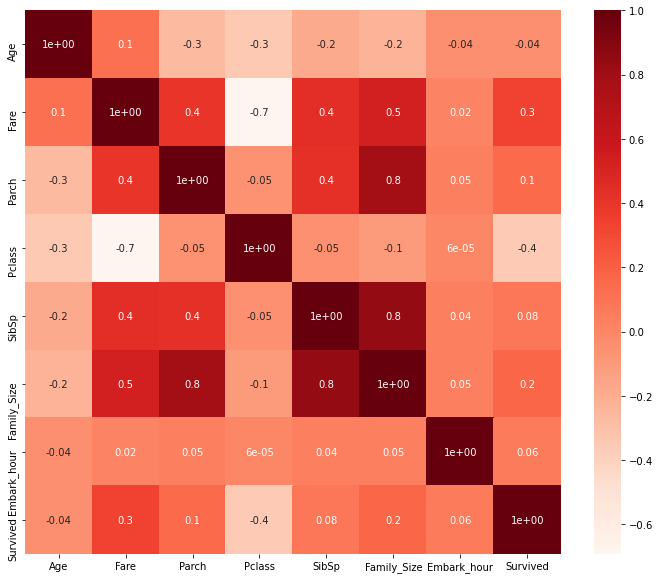

In [33]:
# DO IT
cor_heatmap(cor_spearman)

We can conclude that:
- There is no independent variable highly correlated with the target. We need to use other feature selection techniques to get more insights.
- There are two pairs of variables highly correlated, namely:
    - Parch vs Family_Size (0.8) <br>
    - SibSp vs Family_Size (0.8) <br>

We need to use other techniques of feature selection to decide which variables should we keep (another possible approach was to remove the Family_Size since it is correlated with both variables, but maybe this can have a higher influence on the target).

<a class="anchor" id="9th-bullet">

### 2.1.3. Chi-Square for categorical data

</a>

This time we are going to check the importance of the categorical independent variables in the target. For that, we are going to use the dataset `X_train_cat`.

__`Step 13`__ Create a function named as `TestIndependence` that should receive as arguments the dataset of independent variables, the target, the name of each independent variable and the alpha defined. This function will follow the steps of chi-square to check if a independent variable is an important predictor.

In [34]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

__`Step 14`__ For all the categorical variables available on `X_train_cat`, call the function `TestIndependence`.

In [35]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Cabin is IMPORTANT for Prediction
Embarked is IMPORTANT for Prediction
Name is NOT an important predictor. (Discard Name from model)
Sex is IMPORTANT for Prediction
Ticket is IMPORTANT for Prediction
Title is IMPORTANT for Prediction


According to chi-square, the only categorical variable that we should discard for the final model is the `Name`. 

<a class="anchor" id="10th-bullet">

### 2.1.4. Visualize the weight of the dependent variable in categorical data (EXTRA)

</a>

In this step, we are going to create two plots to check the weight that the dependent variable has in the different labels of a categorical variable. <br><br>
The first plot will represent the frequency of each value of the dependent variable in the different categories, and the second plot will make this representation more intuitive by checking the proportion of the presence of each label of the depedent variable in each category. <br><br>
Sometimes it can be useful not only to use more advanced techniques like the ones we saw previously, but also to explore visually the variables that we have, like we are going to do in this step.

While in the example given you can visualize this relation only to categorical data, you can create your own function where numerical data is split into bins to have a similar visualization.


__`Step 15`__ Create a function where you can visualize the proportion of the presence of each label of the dependent variable in each possible value of a categorical feature. Check the "weight" of the variable `Sex`.

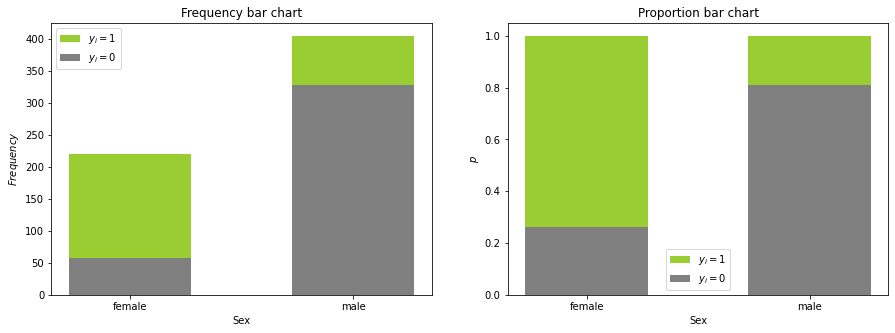

In [36]:
# first join all the training data
all_train = X_train.join(y_train)


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(all_train, "Sex", "Survived")

<a class="anchor" id="11th-bullet">

## 2.2. Wrapper Methods
    
</a>

<a class="anchor" id="12th-bullet">

### 2.2.1. RFE
    
</a>

This time we are going to apply Recursive Feature Elimination (RFE / Backwards) that will allow to select the most important features to keep. The base estimator used will be a Logistic Regression.


__`Step 16`__ Using LogisticRegression, create a Logistic Regression Classifier instance called `model`
- _Documentation sklearn.linear_model.LogisticRegression():_ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [39]:
# DO IT

model = LogisticRegression()

__`Step 17`__ Using RFE, create a RFE instance called `rfe` and initialize by defining the following parameters:
- `estimator` = model
- `n_features_select` = 3 <br> <br>

- _Documentation sklearn.feature_selection.RFE():_ https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [42]:
# DO IT
rfe = RFE(estimator = model, n_features_to_select = 3)

__`Step 18`__ Transform the data using RFE by applying the method `fit_transform()` to the instance `rfe`, where `X` should be assigned to your independent variables and `y` to the dependent variable and assign it to the object `X_rfe`

In [43]:
# DO IT
X_rfe = rfe.fit_transform(X_train_num_scaled,y_train)

__`Step 20`__ Check the variables that were selected by RFE as the most "important" ones by calling the attribute `support_` to `rfe`.

In [52]:
# DO IT
print(X_train_num_scaled.columns)
print(rfe.support_)

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size',
       'Embark_hour'],
      dtype='object')
[ True False  True  True False False False]


__`Step 21`__ Check the ranking of the variables defined by RFE as the most "important" ones by applying the attribute `ranking_` to `rfe`.

In [53]:
# DO IT

rfe.ranking_

array([1, 3, 1, 1, 2, 5, 4])

__Step 22:__ Create an object (pandas Series) named `selected_features` that will have as index the `X_train_num` columns names and the `support_` attribute as value. <br>
- _Documentation pandas.Series():_ https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [56]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age             True
Fare           False
Parch          False
Pclass         False
SibSp          False
Family_Size    False
Embark_hour    False
dtype: bool

If you don't know apriori the number of features to select you can create a loop to check the score of the estimator using a different number of features. <br>
Below you have an example that will check the score of the estimator by chosing between 1 and 8 variables.

In [65]:
#no of features
nof_list=np.arange(1,7)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.712687


According to RFE, the numerical variables that we should keep for the final model are `Age`, `Parch` and `PClass`.

<a class="anchor" id="13th-bullet">

## 2.3. Embedded Methods
    
</a>

<a class="anchor" id="14th-bullet">

### 2.3.1. Lasso Regression
    
</a>

__Step 23:__ Create a function to plot the importance of the features named `plot_importance()` that should receive as parameters the "importance" of each variable (`coef`) and a `name` to define the title.  Define the following conditions/steps in the function:
- sort the values of `coef` asn assign it to the object `imp_coef`
- the size of the figure should be (8,10)
- create a matplotlib plot `kind = barh` to plot the `imp_coef`.
- Define the title as "Feature importance using" + _the name of the model_ `name` + " Model"

In [66]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

__Step 24:__ Using LassoCV, create a Lasso Regression instance called `reg`
- _Documentation sklearn.feature_selection.LassoCV():_ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [68]:
# DO IT
reg = LassoCV()

__Step 25:__ Fit the data to `reg` by using the method `fit()` where `X` should be assigned to `data` and `y` to the dependent variable.

In [69]:
# DO IT
reg.fit(X_train_num_scaled, y_train)

LassoCV()

__Step 26:__ Create an object (pandas Series) named `coef` that will have as index the `data` columns names and the `coef_` attribute as value.

In [72]:
# DO IT
coef = pd.Series(reg.coef_, index= X_train_num_scaled.columns)
coef

Age           -0.622729
Fare           0.328110
Parch          0.291090
Pclass        -0.435026
SibSp         -0.416860
Family_Size   -0.000000
Embark_hour    0.081247
dtype: float64

__Step 27:__ Check how many variables did Lasso picked (if the coef is different from 0) and how many variables did Lasso eliminated (if the coef is equal to 0).

In [ ]:
# DO IT


__Step 28:__ Sort the values of `coef` using the method `sort_values()`.

In [73]:
# DO IT
coef.sort_values()

Age           -0.622729
Pclass        -0.435026
SibSp         -0.416860
Family_Size   -0.000000
Embark_hour    0.081247
Parch          0.291090
Fare           0.328110
dtype: float64

__Step 29:__ By calling the function `plot_importance()` that we created on step 15, plot the feature importance of the variables, by passing as parameters the object `coef` and the name `"Lasso"`

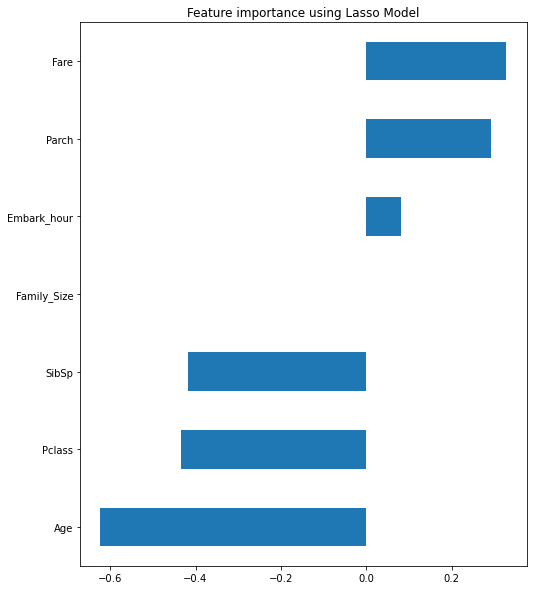

In [76]:
# DO IT
plot_importance(coef,'Lasso')

According to Lasso, we should discard the `Family Size`, and the `Embark_hour` seems also insignificant for the definition of the target comparing to the remaining predictors.



<a class="anchor" id="15th-bullet">

## Final Insights:
    
</a>

<hr>

### Numerical Data

| Predictor | Spearman | RFE | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |
| Age | Discard | Keep | Keep | Include in the model |
| Fare | Discard | Discard | Keep ? | Discard |
| Parch | Discard | Keep | Keep ?| Include in the model |
| PClass | Discard | Keep | Keep | Include in the model |
| SibSp | Discard | Discard | Keep | Try with and without |
| Family_Size | Discard | Discard | Discard |  Discard |
| Embark_Hour | Discard | Discard | Discard |  Discard |

<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Cabin | Keep |  
| Embarked | Keep | 
| Name | Discard|
| Sex | Keep | 
| Ticket | Keep | 
| Title | Keep |

<hr>

